**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as ma

def median(img, n, m):

    mat = np.zeros((n, m))
    
    tam = n * m

    mat[::] = (float)(1.0 / tam)

    return filtragem(img, mat, False)

def gauss(img,n,m,sigma):

    fator = 1 / ma.sqrt(2 * ma.pi * sigma**2)

    sum = (float)(0)

    mat = np.zeros((n, m))

    a = (int)((n - 1) / 2)
    b = (int)((m - 1) / 2)

    x = (int)(-a)
    while(x <= a):
        y = (int)(-b)
        while(y <= b):

            mat[x + a,y + b] = fator * ma.exp(-((x**2 + y**2) / (2 * sigma**2)))

            sum += mat[x + a][y + b]

            y += 1
        x += 1

    mat = mat / sum

    sum = 0 

    x = (int)(-a)
    while(x <= a):
        y = (int)(-b)
        while(y <= b):

            sum += mat[x + a][y + b]

            y += 1
        x += 1

    return filtragem(img, mat, False)

def filtragem(img, mat, inv):

    lin = img.shape[0]    
    col = img.shape[1]

    n = mat.shape[0]
    m = mat.shape[1]

    img_pad = np.zeros((lin + 2 * n, col + 2 * m))
    img_pad[n:lin+n,m:col+m] = img

    img2_pad = np.zeros((lin + 2 * n, col + 2 * m))

    a = (int)((n - 1) / 2)
    b = (int)((m - 1) / 2)

    x = (int)(0)
    while(x < lin + 2 * n):
        y = (int)(0)
        while(y < col + 2 * m):
            s = (int)(-a)
            while(s <= a):
                t = (int)(-b)
                while(t <= b):

                    if(inv == False):

                        if(x + s < 0 or lin + 2 * n <= x + s): 
                            t += 1
                            continue
                        
                        if(y + t < 0 or col + 2 * m <= y + t):  
                            t += 1
                            continue

                        img2_pad[x,y] += img_pad[x + s, y + t] * mat[s + a, t + b]

                    else:

                        if(x - s < 0 or lin + 2 * n <= x - s): 
                            t += 1
                            continue
                        
                        if(y - t < 0 or col + 2 * m <= y - t):  
                            t += 1
                            continue

                        img2_pad[x,y] += img_pad[x - s, y - t] * mat[s + a, t + b]

                    t += 1
                s += 1
            y += 1
        x += 1

    img2 = img2_pad[n:lin+n,m:col+m]
    
    return img2

print("Teste")

im = np.zeros((5,5))

im[2,2] = 1

mat = np.matrix([[1,2,3],[4,5,6],[7,8,9]])

print(filtragem(im, mat, False))
print(filtragem(im, mat, True))

Teste
[[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]


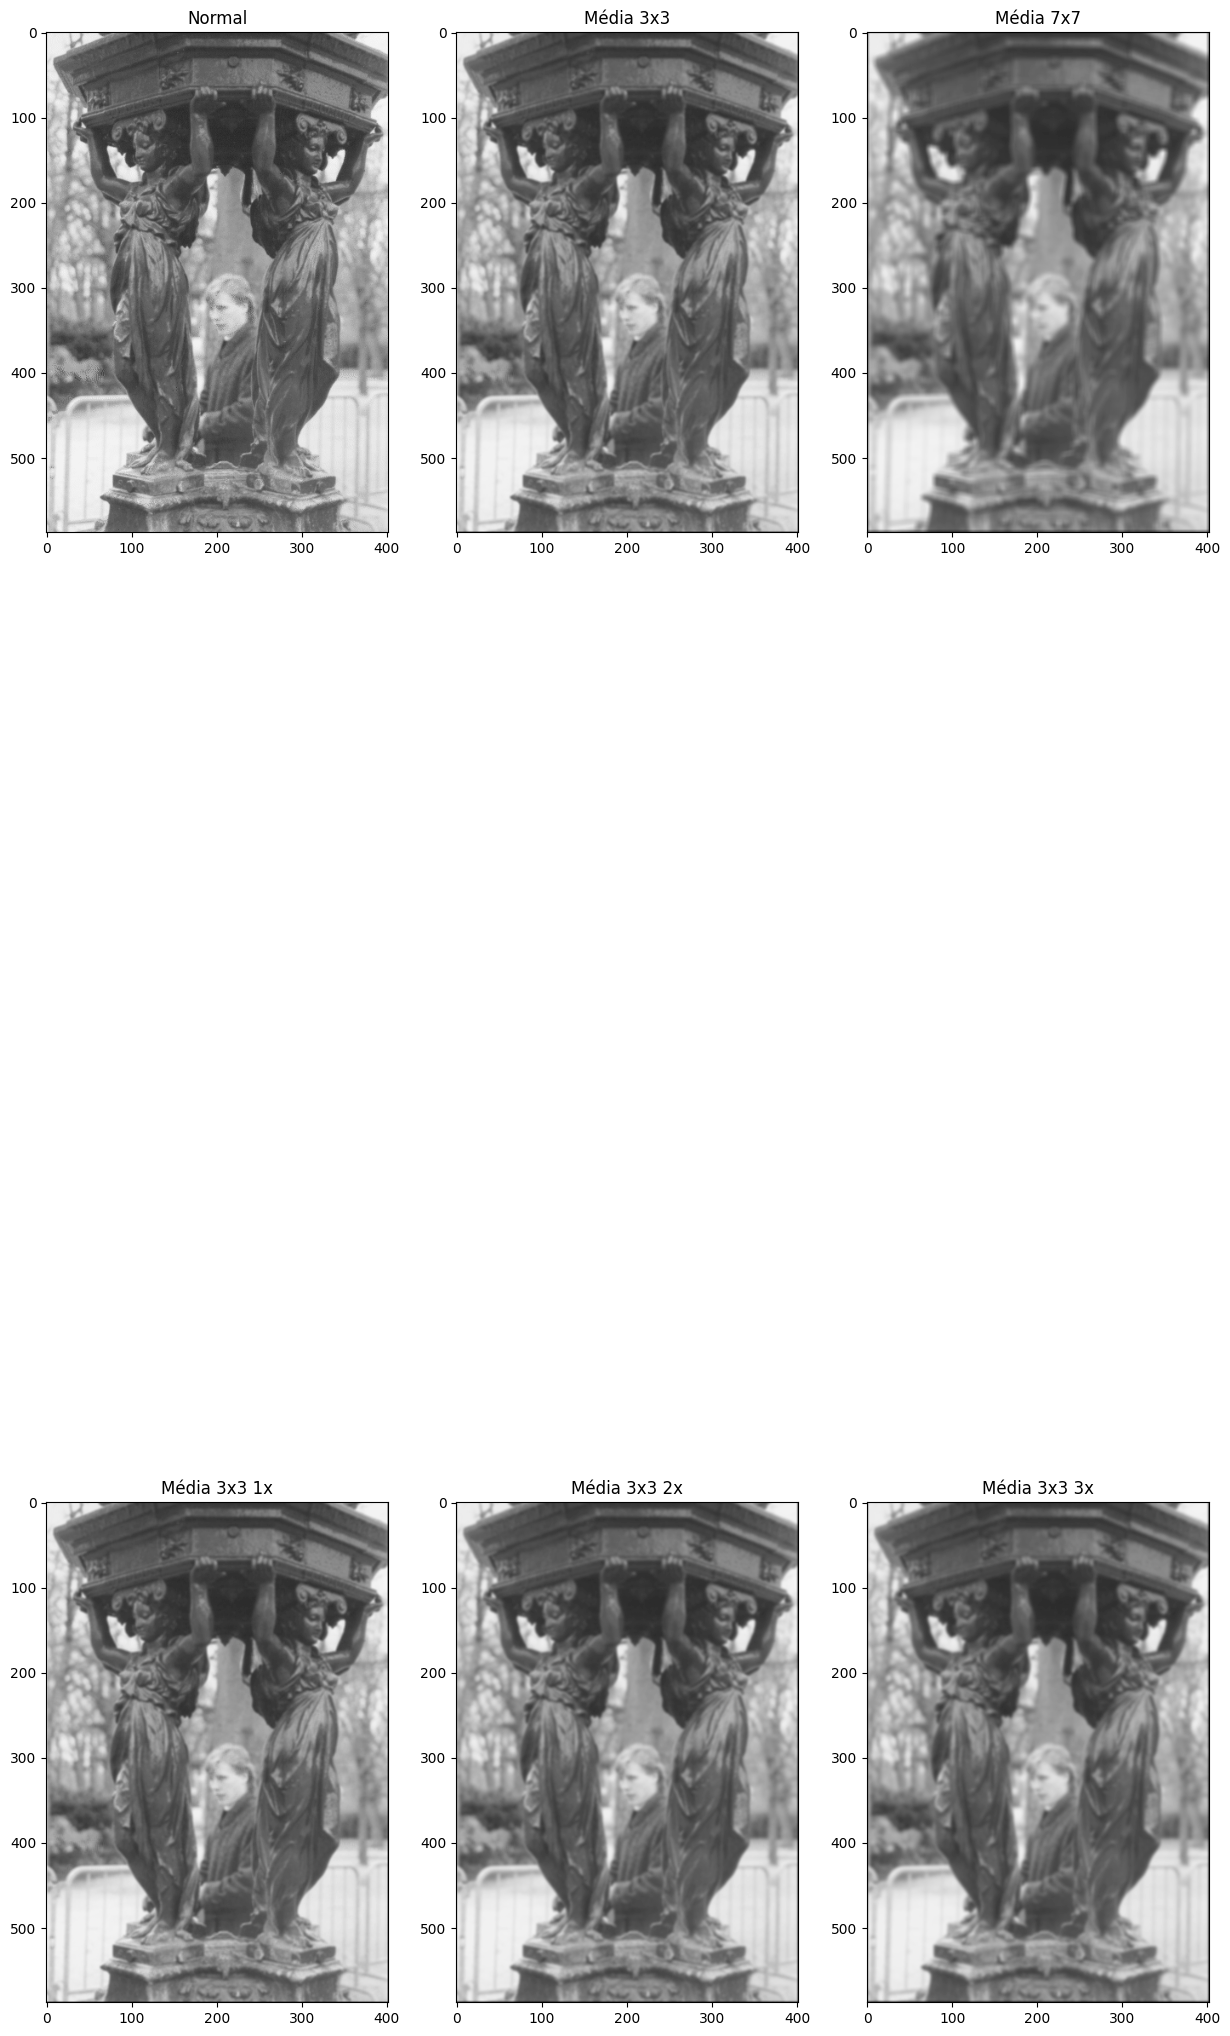

In [2]:
# code here

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img41 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img42 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img43 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

img2 = median(img1, 3, 3).astype(int)
img3 = median(img1, 7, 7).astype(int)
img41 = img2
img42 = median(img41, 3, 3).astype(int)
img43 = median(img42, 3, 3).astype(int)

plt.figure(figsize=(15, 35))

plt.subplot(2, 3, 1)
plt.title('Normal')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 2)
plt.title('Média 3x3')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 3)
plt.title('Média 7x7')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 4)
plt.title('Média 3x3 1x')
plt.imshow(img41, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 5)
plt.title('Média 3x3 2x')
plt.imshow(img42, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 6)
plt.title('Média 3x3 3x')
plt.imshow(img43, cmap='gray', vmin=0, vmax=255)


2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

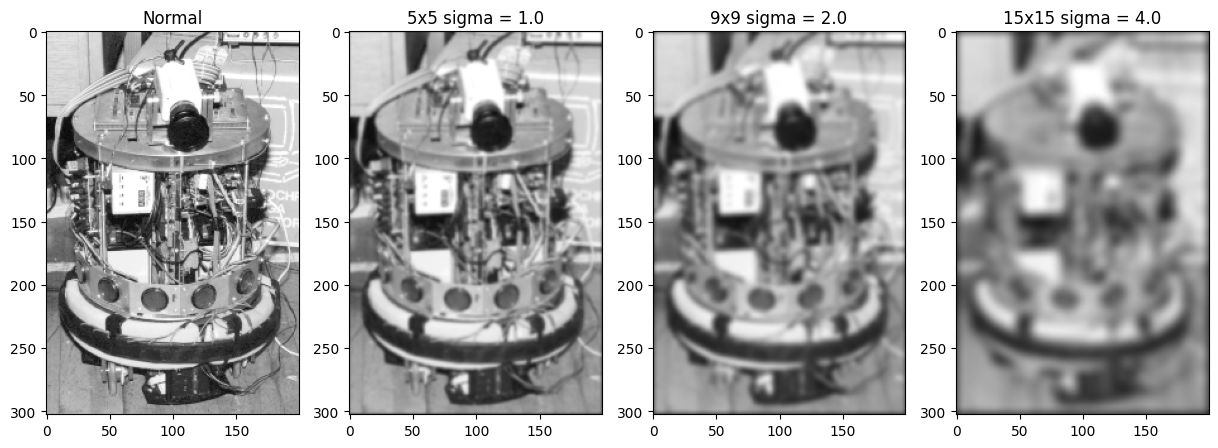

In [3]:
#  code here
img1 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

img2 = gauss(img1, 5, 5, 1.0)
img3 = gauss(img1, 9, 9, 2.0)
img4 = gauss(img1, 15, 15, 4.0)

plt.figure(figsize=(15, 40))

plt.subplot(1, 4, 1)
plt.title('Normal')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 4, 2)
plt.title('5x5 sigma = 1.0')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 4, 3)
plt.title('9x9 sigma = 2.0')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 4, 4)
plt.title('15x15 sigma = 4.0')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

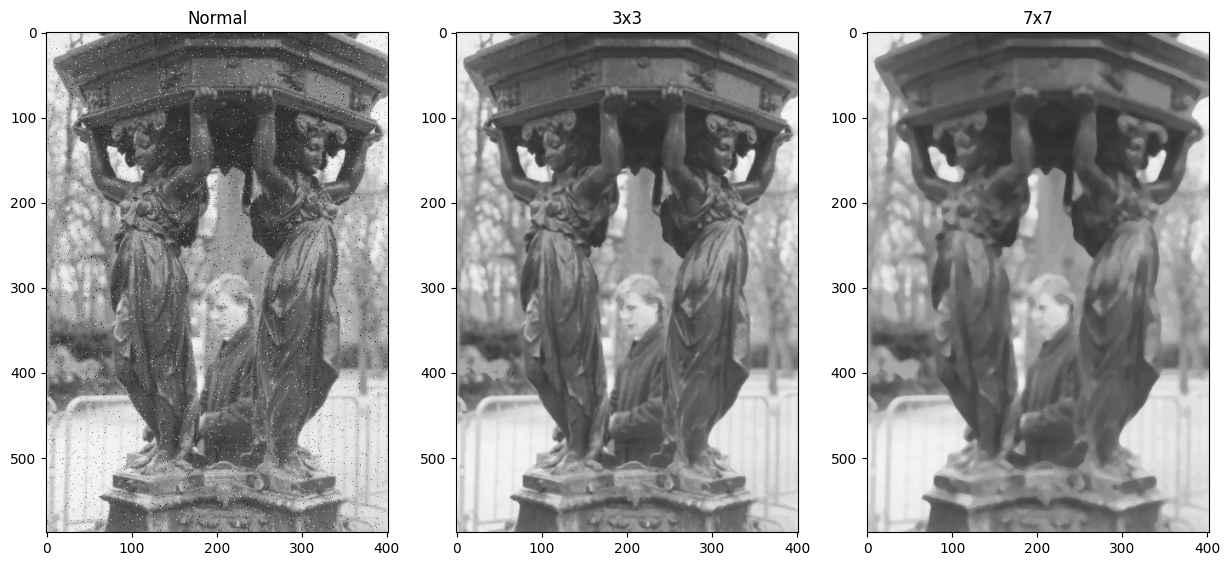

In [4]:
#  code here

def mediana(img, n, m):

    lin = img.shape[0]    
    col = img.shape[1]

    img2 = np.zeros((lin, col))

    tam = (int)(n * m)

    vet = np.zeros(tam)

    a = (int)((n - 1) / 2)
    b = (int)((m - 1) / 2)

    x = (int)(0)
    while(x < lin):
        y = (int)(0)
        while(y < col):

            q = (int)(0)

            s = (int)(-a)
            while(s <= a):
                t = (int)(-b)
                while(t <= b):

                    if(x + s < 0 or lin <= x + s): 
                        t += 1
                        continue
                    
                    if(y + t < 0 or col <= y + t):  
                        t += 1
                        continue

                    vet[q] = img[x + s, y + t]
                    q += 1

                    t += 1
                s += 1

            ign = (int)(tam - q)

            k = (int)(q)

            while(k < tam): 
                vet[k] = -1
                k += 1

            vet = np.sort(vet)

            img2[x,y] = vet[(int)((q - 1) / 2) + ign]

            y += 1
        x += 1
    
    return img2


img1 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

img2 = mediana(img1, 3, 3)
img3 = mediana(img1, 7, 7)

plt.figure(figsize=(15, 40))

plt.subplot(1, 3, 1)
plt.title('Normal')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 2)
plt.title('3x3')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 3)
plt.title('7x7')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);


4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

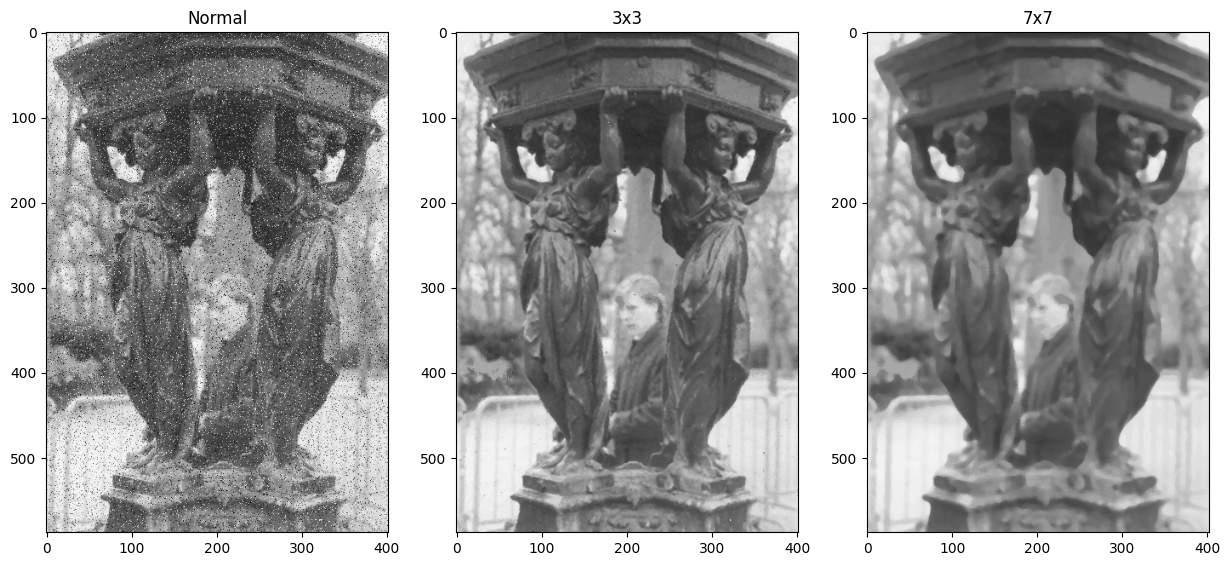

In [5]:
#  code here

img1 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

img2 = mediana(img1, 3, 3)
img3 = mediana(img1, 7, 7)

plt.figure(figsize=(15, 40))

plt.subplot(1, 3, 1)
plt.title('Normal')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 2)
plt.title('3x3')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 3)
plt.title('7x7')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);
